In [1]:
# Bibliotecas e Dataset
# Dataset : https://www.kaggle.com/datasets/budincsevity/szeged-weather/data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
# Carregando o dataset e mostrando alguns dados
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS2wjF15JFyELszplzKWoaKqoIsh8SU9jw7Z0vzR0DwTztAGBsm07bdSCZY8GNOsCp3MeiTBv5BJcrX/pub?gid=638916406&single=true&output=csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472.222.222.222.220,73.888.888.888.888.800,0.89,141.197,251.0,15.826.300.000.000.000,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355.555.555.555.550,7.227.777.777.777.770,0.86,142.646,259.0,15.826.300.000.000.000,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377.777.777.777.770,9.377.777.777.777.770,0.89,39.284.000.000.000.000,204.0,149.569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,828.888.888.888.889,5.944.444.444.444.440,0.83,141.036,269.0,15.826.300.000.000.000,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755.555.555.555.550,6.977.777.777.777.770,0.83,11.0446,259.0,15.826.300.000.000.000,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [4]:
# Removendo colunas não necessárias para os problemas
df = df.drop(['Formatted Date', 'Summary', 'Daily Summary'], axis=1)

In [5]:
# Visualização após a remoção das colunas
df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,rain,9.472.222.222.222.220,73.888.888.888.888.800,0.89,141.197,251.0,15.826.300.000.000.000,0.0,1015.13
1,rain,9.355.555.555.555.550,7.227.777.777.777.770,0.86,142.646,259.0,15.826.300.000.000.000,0.0,1015.63
2,rain,9.377.777.777.777.770,9.377.777.777.777.770,0.89,39.284.000.000.000.000,204.0,149.569,0.0,1015.94
3,rain,828.888.888.888.889,5.944.444.444.444.440,0.83,141.036,269.0,15.826.300.000.000.000,0.0,1016.41
4,rain,8.755.555.555.555.550,6.977.777.777.777.770,0.83,11.0446,259.0,15.826.300.000.000.000,0.0,1016.51


In [6]:
# Dados categóricos
print('Tipos de precipitação : ', df['Precip Type'].unique())
df['Precip Type'] = df['Precip Type'].fillna('sunny')
print('Tipos de precipitação : ', df['Precip Type'].unique())

Tipos de precipitação :  ['rain' 'snow' nan]
Tipos de precipitação :  ['rain' 'snow' 'sunny']


<Axes: xlabel='Precip Type', ylabel='Temperature (C)'>

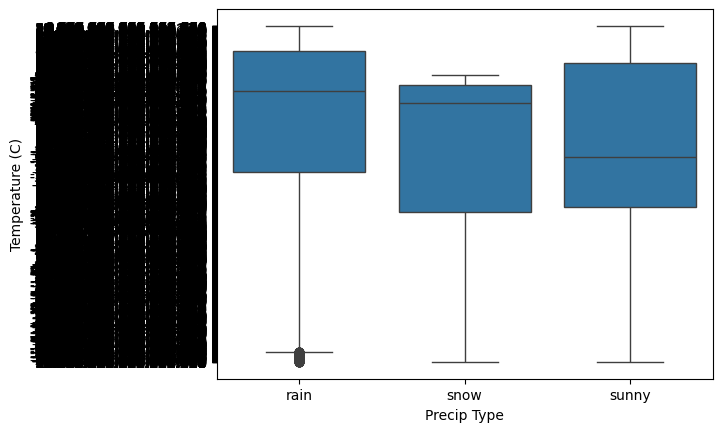

In [7]:
sns.boxplot(data=df, y='Temperature (C)', x = 'Precip Type')

In [8]:
sun_days = df[(df['Precip Type']=='sunny')]
rainy_days = df[(df['Precip Type']=='rain')]
snow_days = df[(df['Precip Type']=='snow')]

<Axes: title={'center': 'Todos'}, xlabel='Temperature (C)', ylabel='Humidity'>

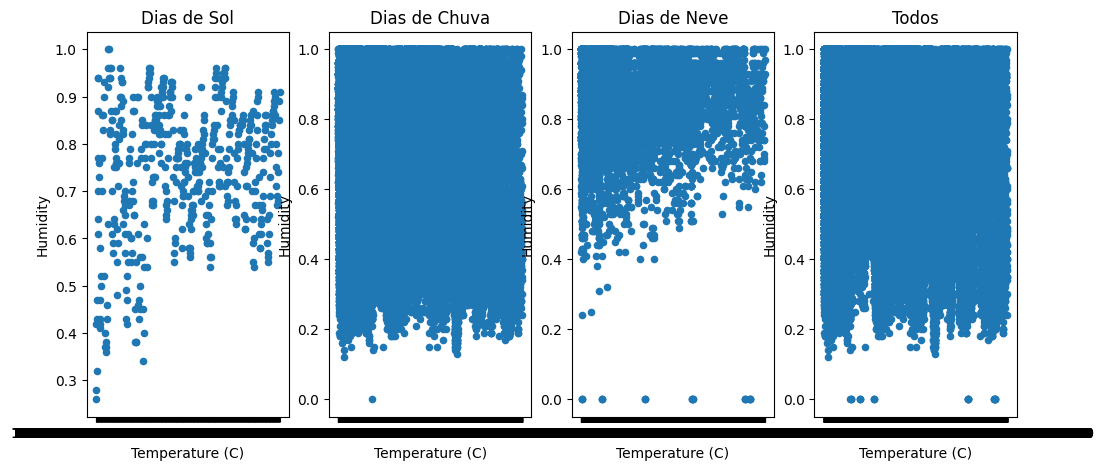

In [9]:
# Gráfico para cada um dos casos
fig, ax = plt.subplots(1,4, figsize=(12,5))
sun_days.plot(x='Temperature (C)', y='Humidity', kind='scatter', ax=ax[0], title='Dias de Sol')
rainy_days.plot(x='Temperature (C)', y='Humidity', kind='scatter', ax=ax[1], title='Dias de Chuva')
snow_days.plot(x='Temperature (C)', y='Humidity', kind='scatter', ax=ax[2], title='Dias de Neve')
df.plot(x='Temperature (C)', y='Humidity', kind='scatter', ax=ax[3], title='Todos')

In [10]:
# Dias de sol - Possui maior relação linear entre os dados.
print('**Informação do dataset** \n')
print(sun_days.info())
print('\n**Visualização de variáveis nulas**\n')
print(sun_days.isna().sum())

**Informação do dataset** 

<class 'pandas.core.frame.DataFrame'>
Index: 517 entries, 52672 to 95588
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               517 non-null    object 
 1   Temperature (C)           517 non-null    object 
 2   Apparent Temperature (C)  517 non-null    object 
 3   Humidity                  517 non-null    float64
 4   Wind Speed (km/h)         517 non-null    object 
 5   Wind Bearing (degrees)    517 non-null    float64
 6   Visibility (km)           517 non-null    object 
 7   Loud Cover                517 non-null    float64
 8   Pressure (millibars)      517 non-null    float64
dtypes: float64(4), object(5)
memory usage: 40.4+ KB
None

**Visualização de variáveis nulas**

Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (de

In [14]:
# Separando colunas
input = np.array([sun_days['Apparent Temperature (C)'], sun_days['Temperature (C)'], sun_days['Pressure (millibars)'],
                 sun_days['Wind Speed (km/h)'], sun_days['Wind Bearing (degrees)']],
                 dtype="float32").T

target = np.array([sun_days['Humidity']],
                  dtype="float32").T

ValueError: could not convert string to float: '1.901.666.666.666.660'

In [ ]:
input.shape

In [ ]:
# Transformando em tensor
input = torch.from_numpy(input)
target = torch.from_numpy(target)

In [ ]:
#declare random weight and bias
w = torch.randn(1, 5, requires_grad=True,dtype=torch.float32)
b = torch.randn(1, requires_grad=True, dtype=torch.float32)

In [ ]:
# return (input*weight)+bias
def SModel(x):
    return x @ w.t() + b

In [ ]:
#mean absolute error
def MAE(t1, t2):
    dif = torch.abs(t1 - t2)
    return torch.sum(dif)/dif.numel()

In [ ]:
for i in range(30001):
    pred = SModel(input)
    loss = MAE(pred, target)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 0.00001
        b -= b.grad * 0.00001
        w.grad.zero_()
        b.grad.zero_()
    if (i%1000==0 or i==10000):
        print("Loss:{} at epoch:{}/30000".format(loss, i))

# Funções Integradas

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
tensor_train = TensorDataset(input, target)
dataloader_train = DataLoader(tensor_train, batch_size=5, shuffle=True)

In [ ]:
model = nn.Linear(5, 1)
model.bias

In [ ]:
preds = model(input)
lossfn = nn.SmoothL1Loss()
loss = lossfn(preds, target)
op = torch.optim.SGD(model.parameters(), 0.00001)

In [ ]:
def fit(epochs, model, lossfn, op, dltrain):
    for epoch in range(epochs):
        for i, j in dltrain:
            pred = model(i)
            loss = lossfn(pred, j)
            loss.backward()
            op.step()
            op.zero_grad()
        if (epoch%5==0 or epoch==epochs):
            print("Epoca[{}/{}] Erro: {}".format(epoch+1, epochs, loss))

In [ ]:
fit(100, model, lossfn, op, dataloader_train)